# Customer Segmentation and Optimization
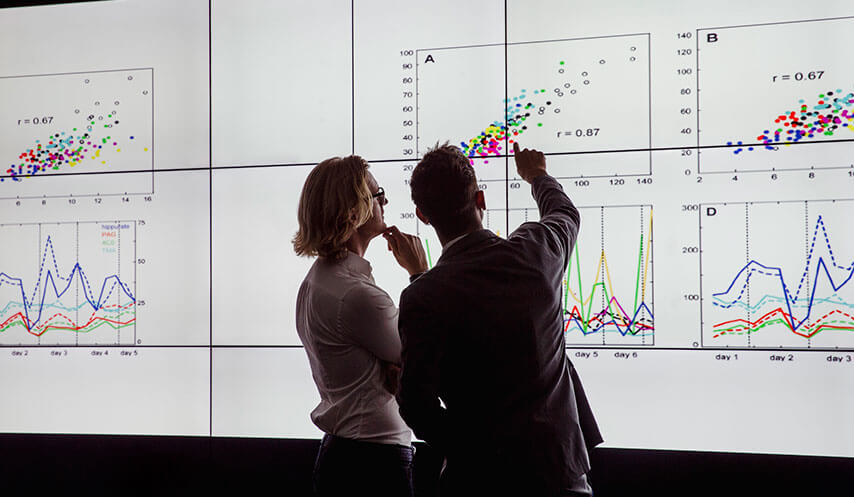

### Customer Segmentation
Customer segmentation is the process by which you divide your customers up based on common characteristics – such as demographics or behaviors, so you can market to those customers more effectively. These customer segmentation groups can also be used to begin discussions of building a marketing person

## Dataset 
The Dataset consist of 4 numerical and 11 cateogorical columns

## Attribute Information


| Features          | Description                                                                           |
| --------------    | ------------------------------------------------------------------------------------- |
| OrderNumber       | An order number is a number that identifies a purchase or order placed by a buyer     |
| Sales Channel     | Sales channel is the way in which a business-to-business (B2B) sales organization goes to market|
| WarehouseCode     | Warehouse Code, Locations or Addresses are one of the main components of a successful warehouse software implementation       |
| ProcuredDate      | Procure mean to obtain so, Procure Date mean obtained Date                            |
| OrderDate         | Order Date means the date on which the final Decision and Order in this matter is issued by the Commission          |
| ShipDate          | Ship date is the date that the order is shipped from the seller or warehouse to the customer           |
| DeliveryDate      | Delivery date is the final date by which the underlying commodity for a futures or forward contract must be delivered for the terms of the contract to be fulfilled                                     |
| CurrencyCode      | Currency codes are the three-letter alphabetic codes that represent the various currencies used throughout the world.                                                                                        |
| SalesTeamID       | A sales team ID is the department responsible for meeting the sales goals of an organization    |
| CustomerID        | Customer ID is a unique identification number given to every Customer                  |
| StoreID           | Store ID is the unique number of your store account                                    |
| ProductID         | Product ID is one of the mandatory fields to be entered, It is nothing but the bar-code of your product and is also known as Global Trade Item Number      |
| Order Quantity    | Order quantity is the quantity of goods that company is ordering from its supplier     |
| Discount Applied  | Discount Applied is a reduction made from the gross amount or value                    |
| Unit Price        | Unit Price tells you the cost per liter, per kilogram, per pound, etc                  |
| Unit Cost         | Unit cost is a total expenditure incurred by a company to produce, store, and sell one unit of a particular product or service |

### load required libraries

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib import pyplot
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [14]:
sns.set(rc={'figure.figsize':(20, 8)})

In [15]:
data = pd.read_excel("US_Regional_Sales_Data.xlsx")

In [16]:
data.head()

,OrderNumber,Sales Channel,WarehouseCode,ProcuredDate,OrderDate,ShipDate,DeliveryDate,CurrencyCode,_SalesTeamID,_CustomerID,_StoreID,_ProductID,Order Quantity,Discount Applied,Unit Price,Unit Cost
0,SO - 000101,In-Store,WARE-UHY1004,2017-12-31,2018-05-31,2018-06-14,2018-06-19,USD,6,15,259,12,5,0.075,1963.1,1001.181
1,SO - 000102,Online,WARE-NMK1003,2017-12-31,2018-05-31,2018-06-22,2018-07-02,USD,14,20,196,27,3,0.075,3939.6,3348.660
2,SO - 000103,Distributor,WARE-UHY1004,2017-12-31,2018-05-31,2018-06-21,2018-07-01,USD,21,16,213,16,1,0.050,1775.5,781.220
3,SO - 000104,Wholesale,WARE-NMK1003,2017-12-31,2018-05-31,2018-06-02,2018-06-07,USD,28,48,107,23,8,0.075,2324.9,1464.687
4,SO - 000105,Distributor,WARE-NMK1003,2018-04-10,2018-05-31,2018-06-16,2018-06-26,USD,22,49,111,26,8,0.100,1822.4,1476.144


In [17]:
data.rename(columns={'_SalesTeamID':'SalesTeamID', '_CustomerID':'CustomerID','_StoreID':'StoreID','_ProductID':'ProductID'},inplace=True)

In [18]:
data.head()

,OrderNumber,Sales Channel,WarehouseCode,ProcuredDate,OrderDate,ShipDate,DeliveryDate,CurrencyCode,SalesTeamID,CustomerID,StoreID,ProductID,Order Quantity,Discount Applied,Unit Price,Unit Cost
0,SO - 000101,In-Store,WARE-UHY1004,2017-12-31,2018-05-31,2018-06-14,2018-06-19,USD,6,15,259,12,5,0.075,1963.1,1001.181
1,SO - 000102,Online,WARE-NMK1003,2017-12-31,2018-05-31,2018-06-22,2018-07-02,USD,14,20,196,27,3,0.075,3939.6,3348.660
2,SO - 000103,Distributor,WARE-UHY1004,2017-12-31,2018-05-31,2018-06-21,2018-07-01,USD,21,16,213,16,1,0.050,1775.5,781.220
3,SO - 000104,Wholesale,WARE-NMK1003,2017-12-31,2018-05-31,2018-06-02,2018-06-07,USD,28,48,107,23,8,0.075,2324.9,1464.687
4,SO - 000105,Distributor,WARE-NMK1003,2018-04-10,2018-05-31,2018-06-16,2018-06-26,USD,22,49,111,26,8,0.100,1822.4,1476.144


In [19]:
data.describe()

,SalesTeamID,CustomerID,StoreID,ProductID,Order Quantity,Discount Applied,Unit Price,Unit Cost
count,7991.000000,7991.000000,7991.000000,7991.000000,7991.000000,7991.000000,7991.000000,7991.000000
mean,14.384307,25.457014,183.850081,23.771743,4.525341,0.114394,2284.536504,1431.911054
std,7.986086,14.414883,105.903946,13.526545,2.312631,0.085570,1673.096364,1112.413043
min,1.000000,1.000000,1.000000,1.000000,1.000000,0.050000,167.500000,68.675000
25%,8.000000,13.000000,91.000000,12.000000,3.000000,0.050000,1031.800000,606.115500
50%,14.000000,25.000000,183.000000,24.000000,5.000000,0.075000,1849.200000,1080.576000
75%,21.000000,38.000000,276.000000,36.000000,7.000000,0.150000,3611.300000,2040.250500
max,28.000000,50.000000,367.000000,47.000000,8.000000,0.400000,6566.000000,5498.556000


In [20]:
data.describe(include='O')

,OrderNumber,Sales Channel,WarehouseCode,CurrencyCode
count,7991,7991,7991,7991
unique,7991,4,6,1
top,SO - 0002956,In-Store,WARE-NMK1003,USD
freq,1,3298,2505,7991


In [21]:
data.shape

(7991, 16)

## Exploratory Data Analysis

#### Checking for Missing and Incorrect values

In [22]:
data.isnull().sum()

OrderNumber         0
Sales Channel       0
WarehouseCode       0
ProcuredDate        0
OrderDate           0
ShipDate            0
DeliveryDate        0
CurrencyCode        0
SalesTeamID         0
CustomerID          0
StoreID             0
ProductID           0
Order Quantity      0
Discount Applied    0
Unit Price          0
Unit Cost           0
dtype: int64

In [23]:
data.apply(lambda x: print(x.value_counts()))

SO - 0002956    1
SO - 000686     1
SO - 000791     1
SO - 0003057    1
SO - 0008035    1
               ..
SO - 0006493    1
SO - 0005985    1
SO - 0001306    1
SO - 0001775    1
SO - 0007628    1
Name: OrderNumber, Length: 7991, dtype: int64
In-Store       3298
Online         2425
Distributor    1375
Wholesale       893
Name: Sales Channel, dtype: int64
WARE-NMK1003    2505
WARE-PUJ1005    1451
WARE-UHY1004    1265
WARE-XYS1001    1222
WARE-MKL1006     857
WARE-NBV1002     691
Name: WarehouseCode, dtype: int64
2020-06-18    865
2019-12-01    856
2020-03-10    854
2018-10-27    853
2019-02-04    843
2018-07-19    843
2019-08-23    835
2018-04-10    825
2019-05-15    808
2020-09-26    299
2017-12-31    110
Name: ProcuredDate, dtype: int64
2018-08-04    21
2019-05-04    20
2019-01-20    19
2019-04-04    18
2019-07-02    17
              ..
2020-05-02     2
2019-03-28     1
2019-10-11     1
2020-11-27     1
2020-03-20     1
Name: OrderDate, Length: 945, dtype: int64
2019-08-12    18
2019

OrderNumber         None
Sales Channel       None
WarehouseCode       None
ProcuredDate        None
OrderDate           None
ShipDate            None
DeliveryDate        None
CurrencyCode        None
SalesTeamID         None
CustomerID          None
StoreID             None
ProductID           None
Order Quantity      None
Discount Applied    None
Unit Price          None
Unit Cost           None
dtype: object

In [24]:
data.head()

,OrderNumber,Sales Channel,WarehouseCode,ProcuredDate,OrderDate,ShipDate,DeliveryDate,CurrencyCode,SalesTeamID,CustomerID,StoreID,ProductID,Order Quantity,Discount Applied,Unit Price,Unit Cost
0,SO - 000101,In-Store,WARE-UHY1004,2017-12-31,2018-05-31,2018-06-14,2018-06-19,USD,6,15,259,12,5,0.075,1963.1,1001.181
1,SO - 000102,Online,WARE-NMK1003,2017-12-31,2018-05-31,2018-06-22,2018-07-02,USD,14,20,196,27,3,0.075,3939.6,3348.660
2,SO - 000103,Distributor,WARE-UHY1004,2017-12-31,2018-05-31,2018-06-21,2018-07-01,USD,21,16,213,16,1,0.050,1775.5,781.220
3,SO - 000104,Wholesale,WARE-NMK1003,2017-12-31,2018-05-31,2018-06-02,2018-06-07,USD,28,48,107,23,8,0.075,2324.9,1464.687
4,SO - 000105,Distributor,WARE-NMK1003,2018-04-10,2018-05-31,2018-06-16,2018-06-26,USD,22,49,111,26,8,0.100,1822.4,1476.144


#### Correcting Data types

In [25]:
data.dtypes

OrderNumber                 object
Sales Channel               object
WarehouseCode               object
ProcuredDate        datetime64[ns]
OrderDate           datetime64[ns]
ShipDate            datetime64[ns]
DeliveryDate        datetime64[ns]
CurrencyCode                object
SalesTeamID                  int64
CustomerID                   int64
StoreID                      int64
ProductID                    int64
Order Quantity               int64
Discount Applied           float64
Unit Price                 float64
Unit Cost                  float64
dtype: object

In [26]:
data.head()

,OrderNumber,Sales Channel,WarehouseCode,ProcuredDate,OrderDate,ShipDate,DeliveryDate,CurrencyCode,SalesTeamID,CustomerID,StoreID,ProductID,Order Quantity,Discount Applied,Unit Price,Unit Cost
0,SO - 000101,In-Store,WARE-UHY1004,2017-12-31,2018-05-31,2018-06-14,2018-06-19,USD,6,15,259,12,5,0.075,1963.1,1001.181
1,SO - 000102,Online,WARE-NMK1003,2017-12-31,2018-05-31,2018-06-22,2018-07-02,USD,14,20,196,27,3,0.075,3939.6,3348.660
2,SO - 000103,Distributor,WARE-UHY1004,2017-12-31,2018-05-31,2018-06-21,2018-07-01,USD,21,16,213,16,1,0.050,1775.5,781.220
3,SO - 000104,Wholesale,WARE-NMK1003,2017-12-31,2018-05-31,2018-06-02,2018-06-07,USD,28,48,107,23,8,0.075,2324.9,1464.687
4,SO - 000105,Distributor,WARE-NMK1003,2018-04-10,2018-05-31,2018-06-16,2018-06-26,USD,22,49,111,26,8,0.100,1822.4,1476.144


### VISUALIZATION

In [27]:
numerical = ['Order Quantity','Discount Applied','Unit Price','Unit Cost']
categorical = ['Sales Channel','WarehouseCode','CurrencyCode','SalesTeamID','CustomerID','StoreID','ProductID']

### Uni-Variant Analysis

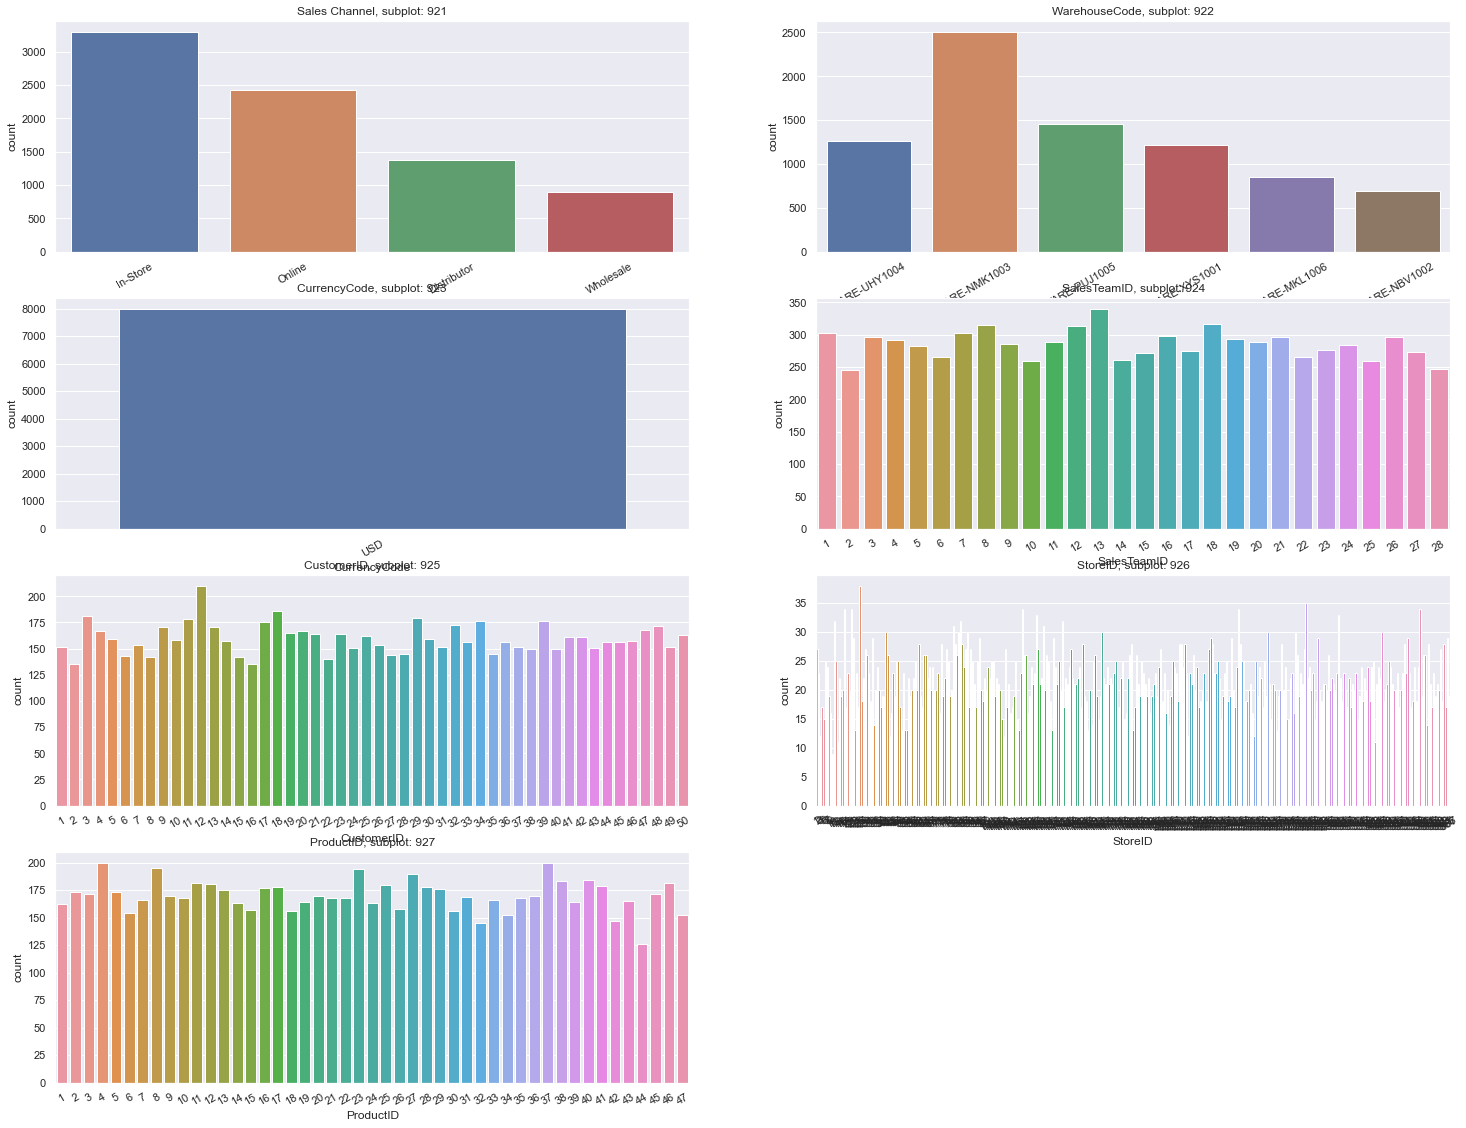

In [28]:
a=9
b=2
c=1
fig = plt.figure(figsize=(25,45))
for i in categorical:
    plt.subplot(a, b, c)
    plt.title('{}, subplot: {}{}{}'.format(i, a, b, c))
    plt.xlabel(i)
    plt.xticks(rotation=30)
    sns.countplot(data[i])
    c = c + 1

###### Analysis from the above plot
    - Most of the sale are done from in-store channel, then from online then distributor, then wholesale. 
    - most of the sale are done from WARE-NMK1003 warehouse.
    - all sale are done in USD.

To better visualize difference between the values of the variable, pie chart is given below.

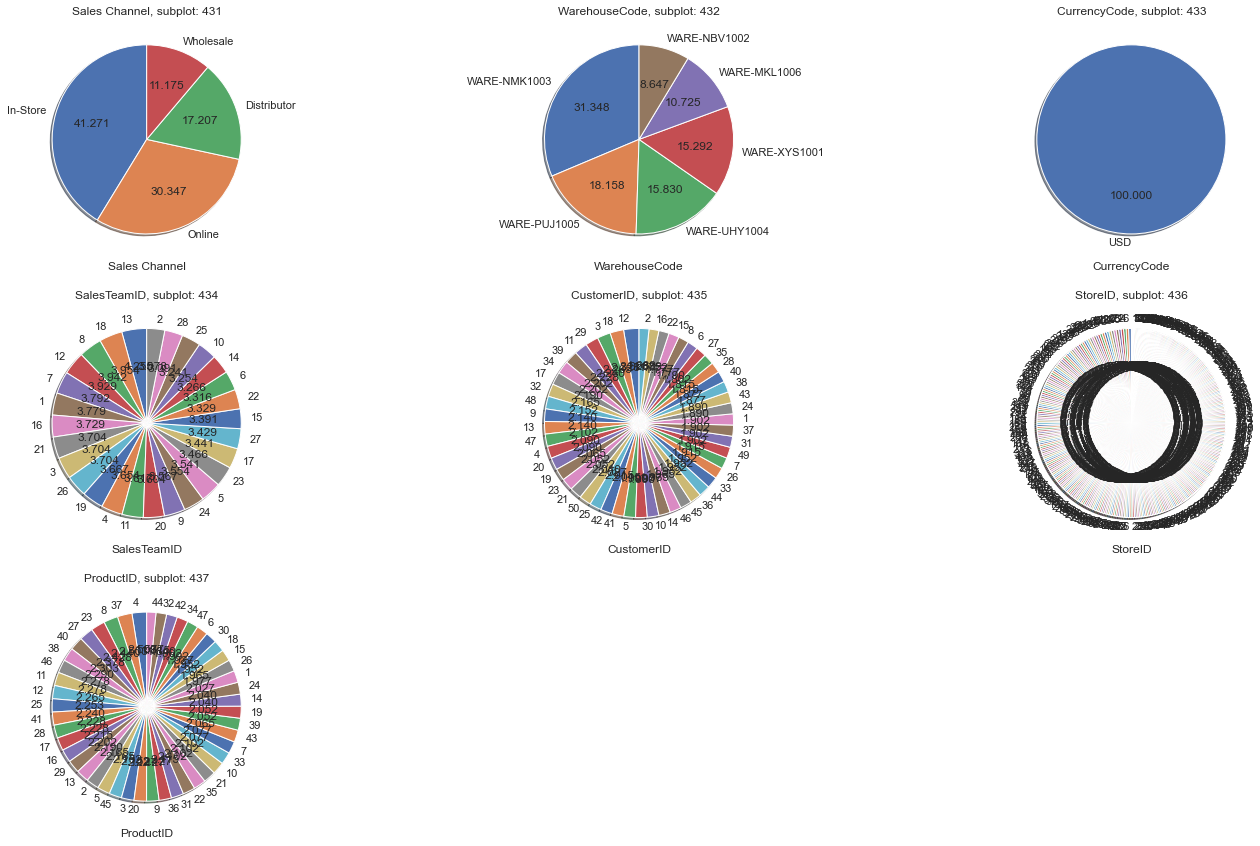

In [29]:
a=4
b=3
c=1
fig = plt.figure(figsize=(25,20))
for i in categorical:
    plt.subplot(a, b, c)
    plt.title('{}, subplot: {}{}{}'.format(i, a, b, c))
    plt.xlabel(i)
    plt.pie(data[i].value_counts(),startangle=90,autopct='%.3f',shadow=True,labels=data[i].value_counts().keys().values)
    c = c + 1

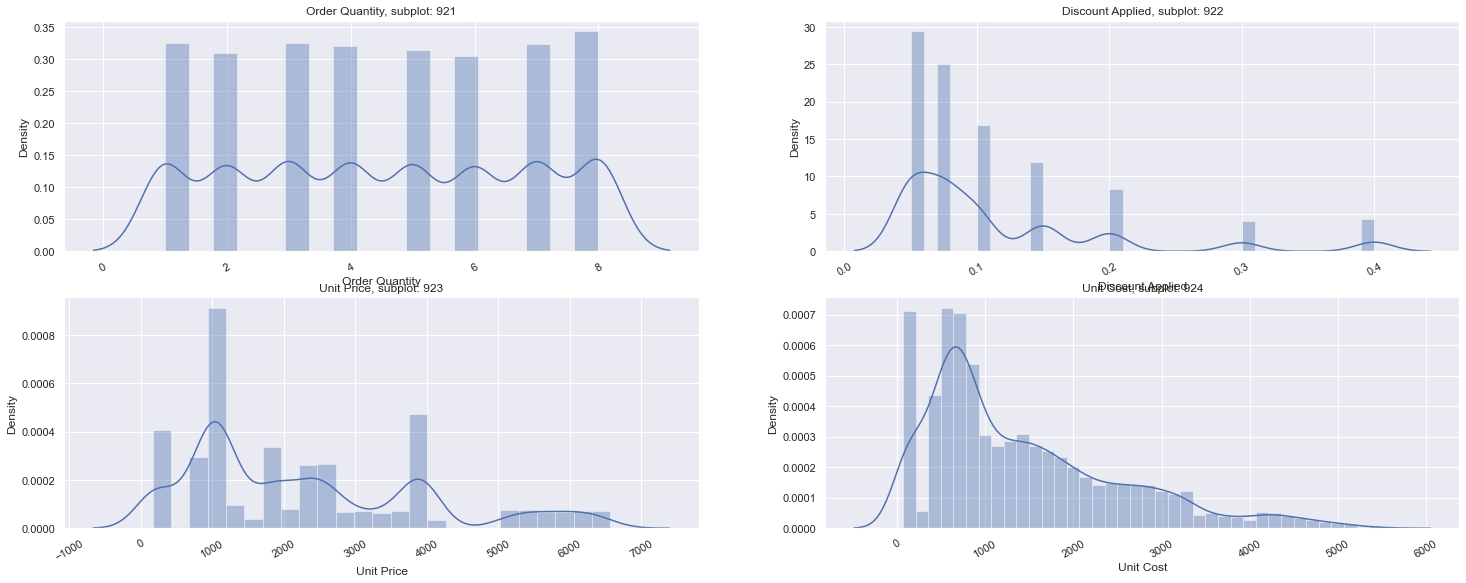

In [30]:
a=9
b=2
c=1
fig = plt.figure(figsize=(25,45))
for i in numerical:
    plt.subplot(a, b, c)
    plt.title('{}, subplot: {}{}{}'.format(i, a, b, c))
    plt.xlabel(i)
    plt.xticks(rotation=30)
    sns.distplot(data[i])
    c = c + 1

###### Analysis from the above plots
    - the number of unit sold are less then 8. this shows that our customers are general public who are buying product for use, not for sale.
    - unit price variables shows that these purchases are made at a very small level. most of the purchase are below 4000$.

### Outlier Detection

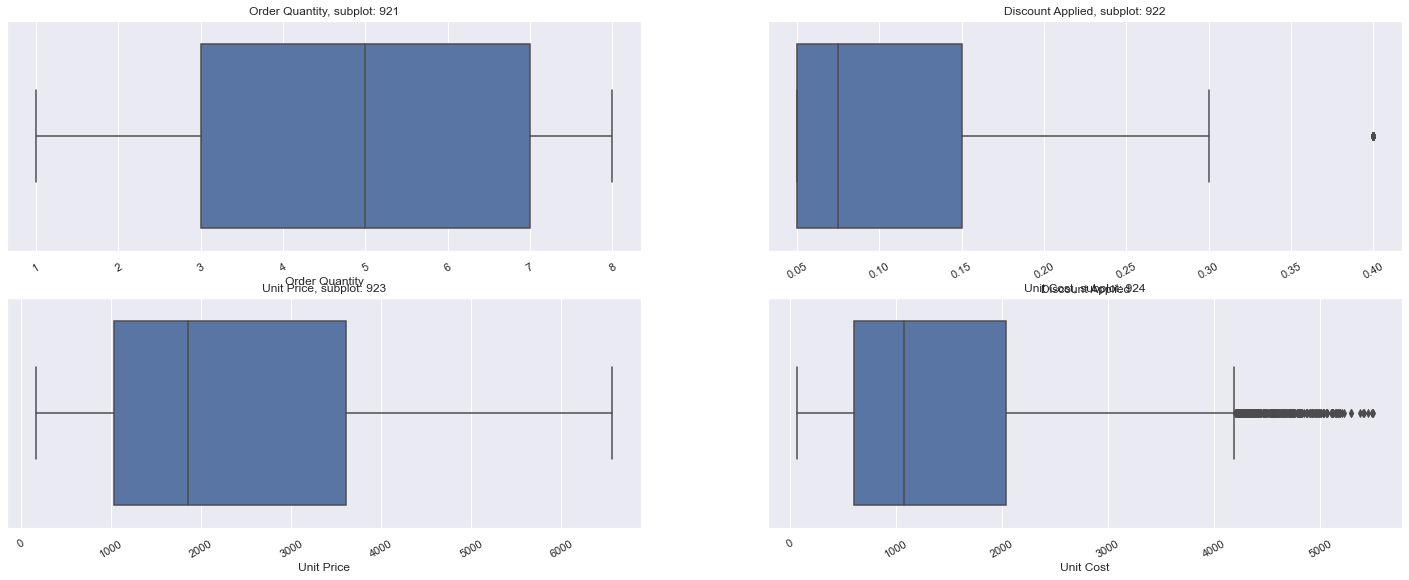

In [31]:
a=9
b=2
c=1
fig = plt.figure(figsize=(25,45))
for i in numerical:
    plt.subplot(a, b, c)
    plt.title('{}, subplot: {}{}{}'.format(i, a, b, c))
    plt.xlabel(i)
    plt.xticks(rotation=30)
    sns.boxplot(data[i])
    c = c + 1

Althrough there are some outliers in the unit cost but we are keeping them for the sake of analysis.

### Feature Encoding

In [32]:
data.head()

,OrderNumber,Sales Channel,WarehouseCode,ProcuredDate,OrderDate,ShipDate,DeliveryDate,CurrencyCode,SalesTeamID,CustomerID,StoreID,ProductID,Order Quantity,Discount Applied,Unit Price,Unit Cost
0,SO - 000101,In-Store,WARE-UHY1004,2017-12-31,2018-05-31,2018-06-14,2018-06-19,USD,6,15,259,12,5,0.075,1963.1,1001.181
1,SO - 000102,Online,WARE-NMK1003,2017-12-31,2018-05-31,2018-06-22,2018-07-02,USD,14,20,196,27,3,0.075,3939.6,3348.660
2,SO - 000103,Distributor,WARE-UHY1004,2017-12-31,2018-05-31,2018-06-21,2018-07-01,USD,21,16,213,16,1,0.050,1775.5,781.220
3,SO - 000104,Wholesale,WARE-NMK1003,2017-12-31,2018-05-31,2018-06-02,2018-06-07,USD,28,48,107,23,8,0.075,2324.9,1464.687
4,SO - 000105,Distributor,WARE-NMK1003,2018-04-10,2018-05-31,2018-06-16,2018-06-26,USD,22,49,111,26,8,0.100,1822.4,1476.144


In [33]:
from numpy import array
from sklearn.preprocessing import LabelEncoder

In [34]:
label_encoder = LabelEncoder()
data['Sales Channel'] = label_encoder.fit_transform(data['Sales Channel'])
data['WarehouseCode'] = label_encoder.fit_transform(data['WarehouseCode'])
data['CurrencyCode'] = label_encoder.fit_transform(data['CurrencyCode'])

In [35]:
data.head()

,OrderNumber,Sales Channel,WarehouseCode,ProcuredDate,OrderDate,ShipDate,DeliveryDate,CurrencyCode,SalesTeamID,CustomerID,StoreID,ProductID,Order Quantity,Discount Applied,Unit Price,Unit Cost
0,SO - 000101,1,4,2017-12-31,2018-05-31,2018-06-14,2018-06-19,0,6,15,259,12,5,0.075,1963.1,1001.181
1,SO - 000102,2,2,2017-12-31,2018-05-31,2018-06-22,2018-07-02,0,14,20,196,27,3,0.075,3939.6,3348.660
2,SO - 000103,0,4,2017-12-31,2018-05-31,2018-06-21,2018-07-01,0,21,16,213,16,1,0.050,1775.5,781.220
3,SO - 000104,3,2,2017-12-31,2018-05-31,2018-06-02,2018-06-07,0,28,48,107,23,8,0.075,2324.9,1464.687
4,SO - 000105,0,2,2018-04-10,2018-05-31,2018-06-16,2018-06-26,0,22,49,111,26,8,0.100,1822.4,1476.144


In [36]:
data.dtypes

OrderNumber                 object
Sales Channel                int32
WarehouseCode                int32
ProcuredDate        datetime64[ns]
OrderDate           datetime64[ns]
ShipDate            datetime64[ns]
DeliveryDate        datetime64[ns]
CurrencyCode                 int32
SalesTeamID                  int64
CustomerID                   int64
StoreID                      int64
ProductID                    int64
Order Quantity               int64
Discount Applied           float64
Unit Price                 float64
Unit Cost                  float64
dtype: object

### Bi-Variant Analysis

<AxesSubplot:>

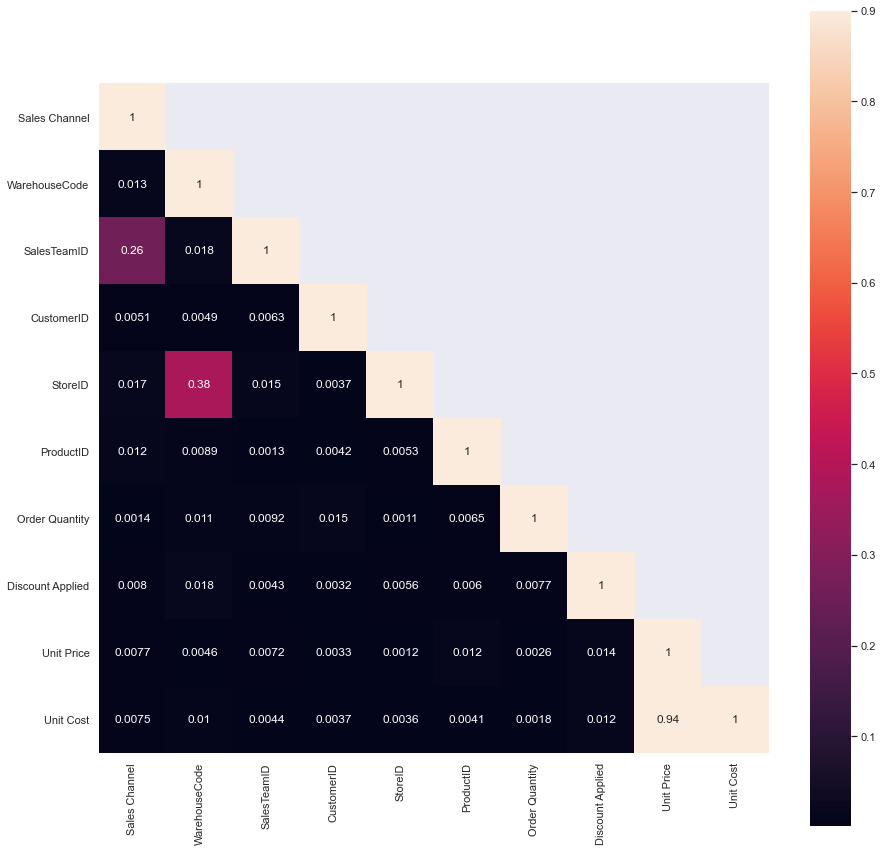

In [37]:
df=data.copy()
del df['CurrencyCode']
#create correlation
corr = df.corr(method = 'pearson').abs()

#convert correlation to numpy array
mask = np.array(corr)

#to mask the repetitive value for each pair
mask[np.tril_indices_from(mask)] = False
fig, ax = plt.subplots(figsize = (15,12))
fig.set_size_inches(15,15)
sns.heatmap(corr, mask = mask, vmax = 0.9, square = True, annot = True)

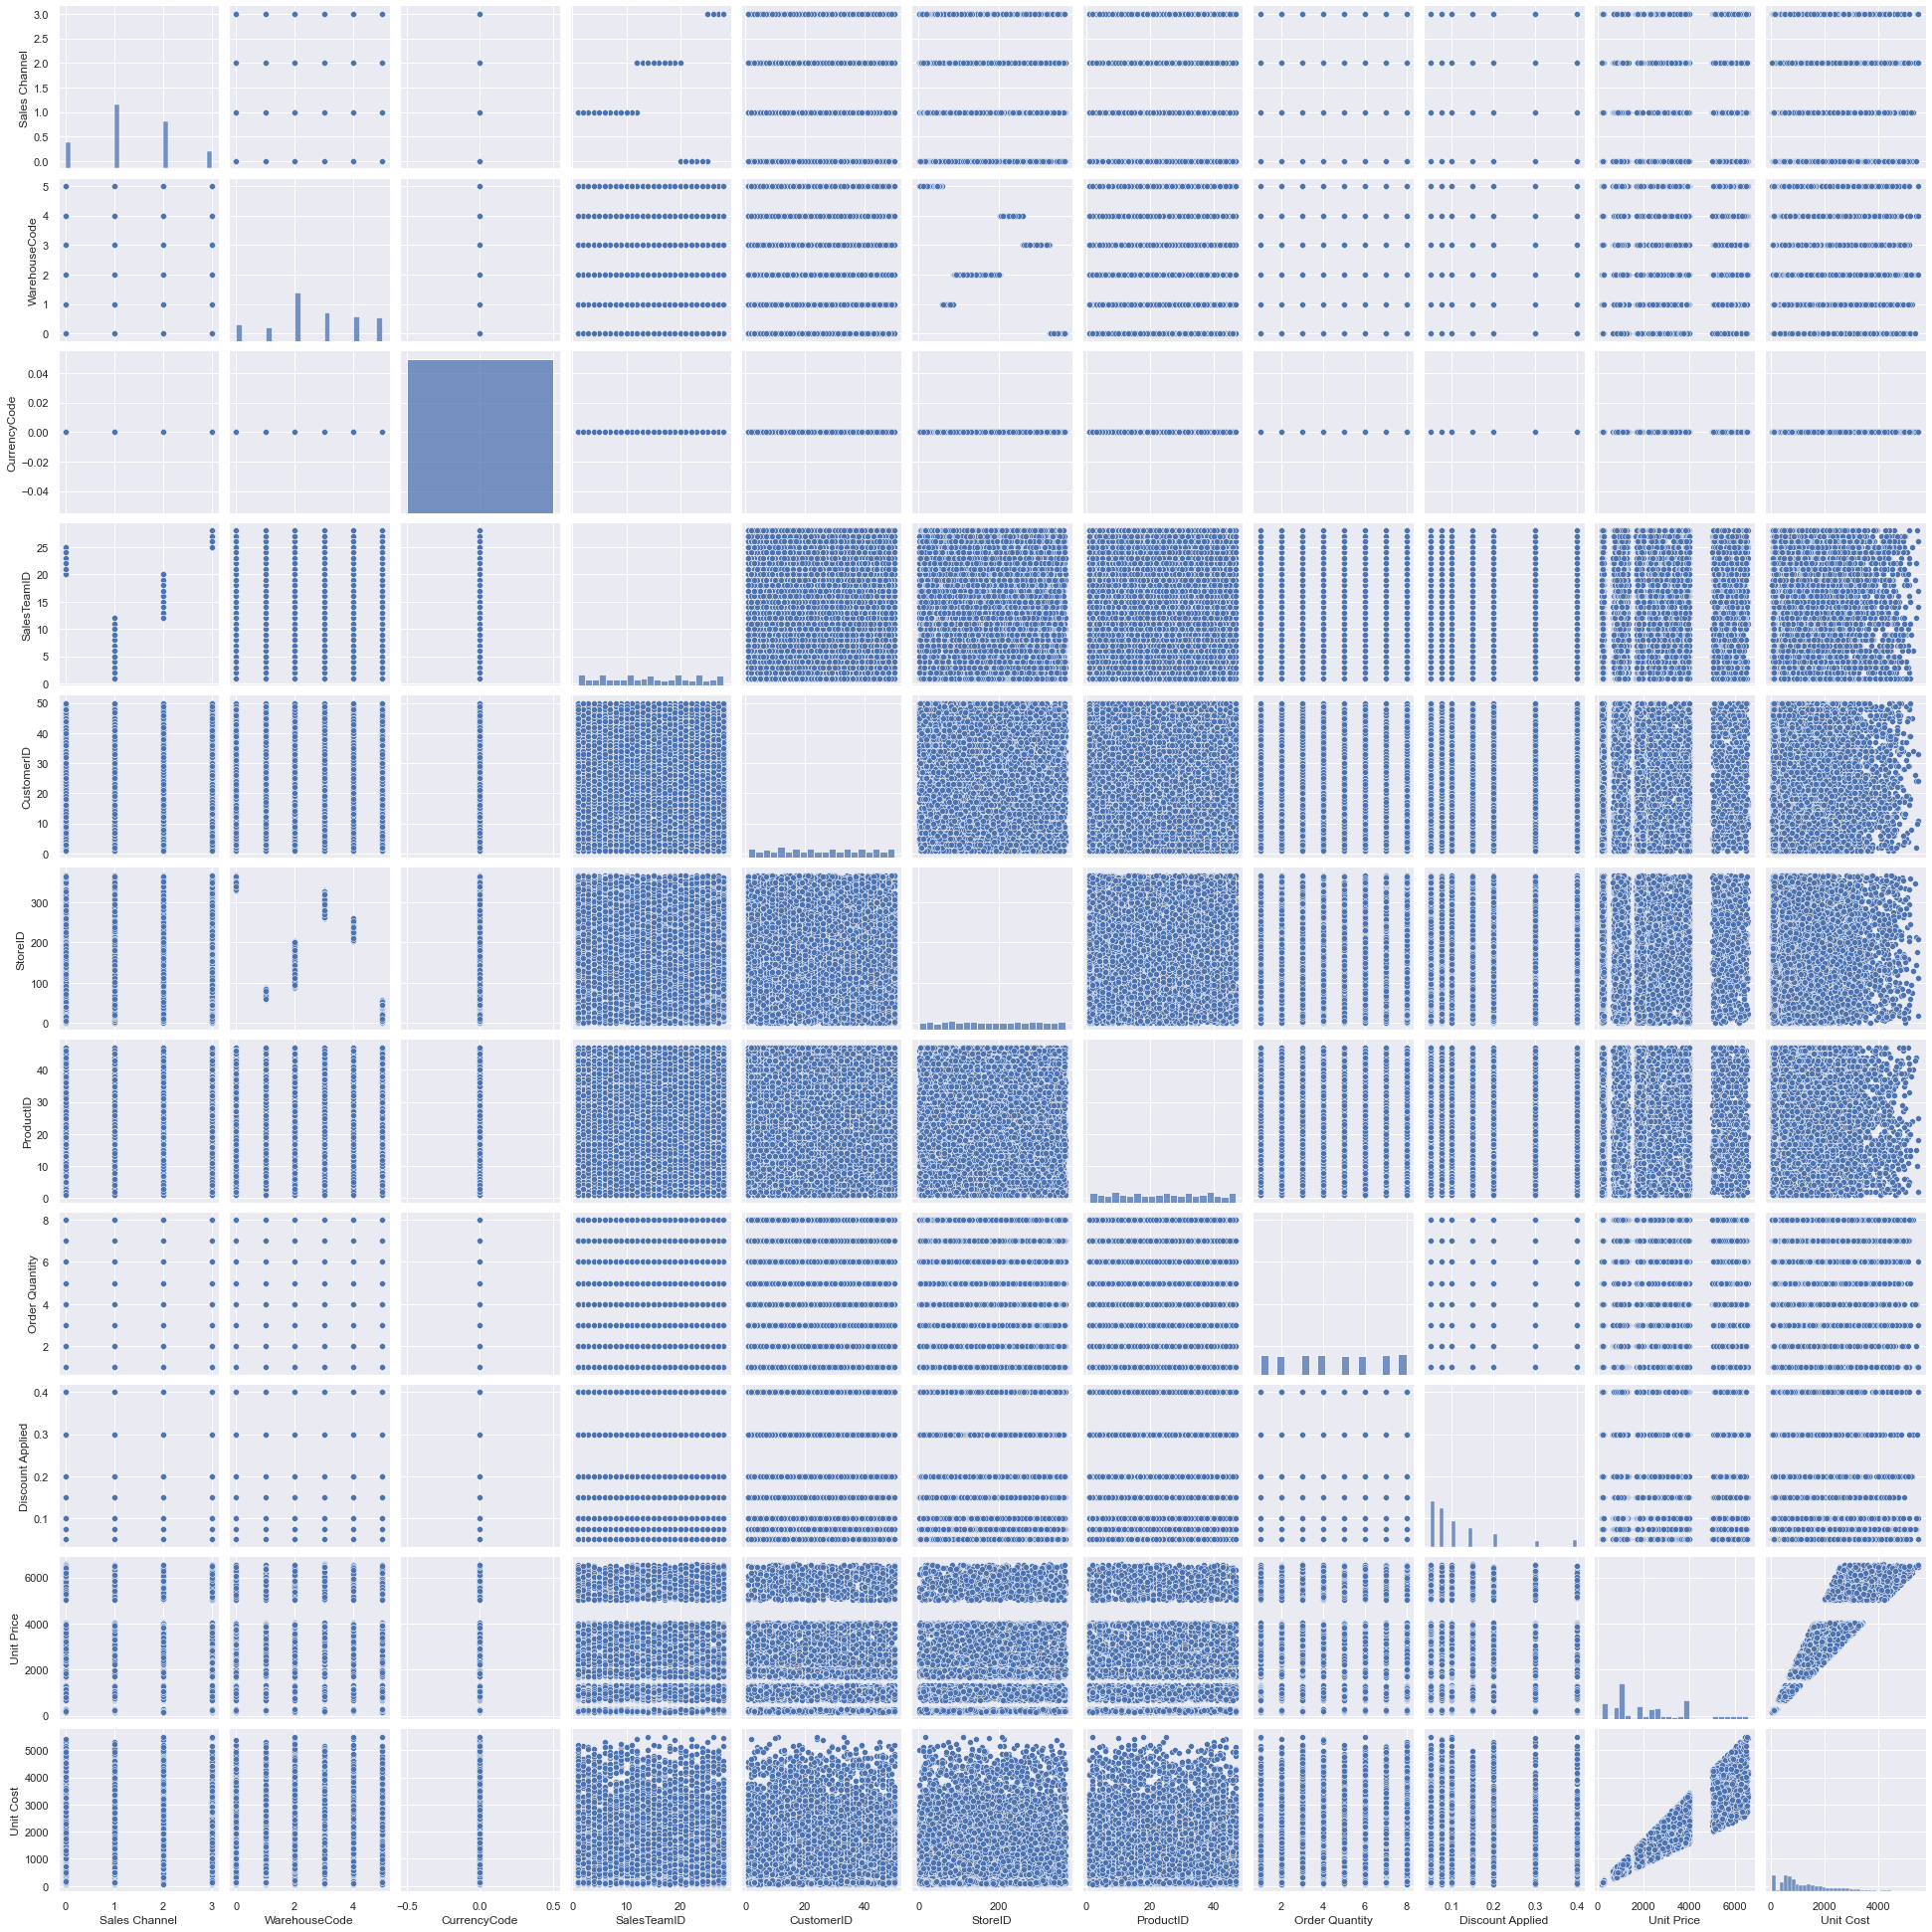

In [38]:
sns.pairplot(data)

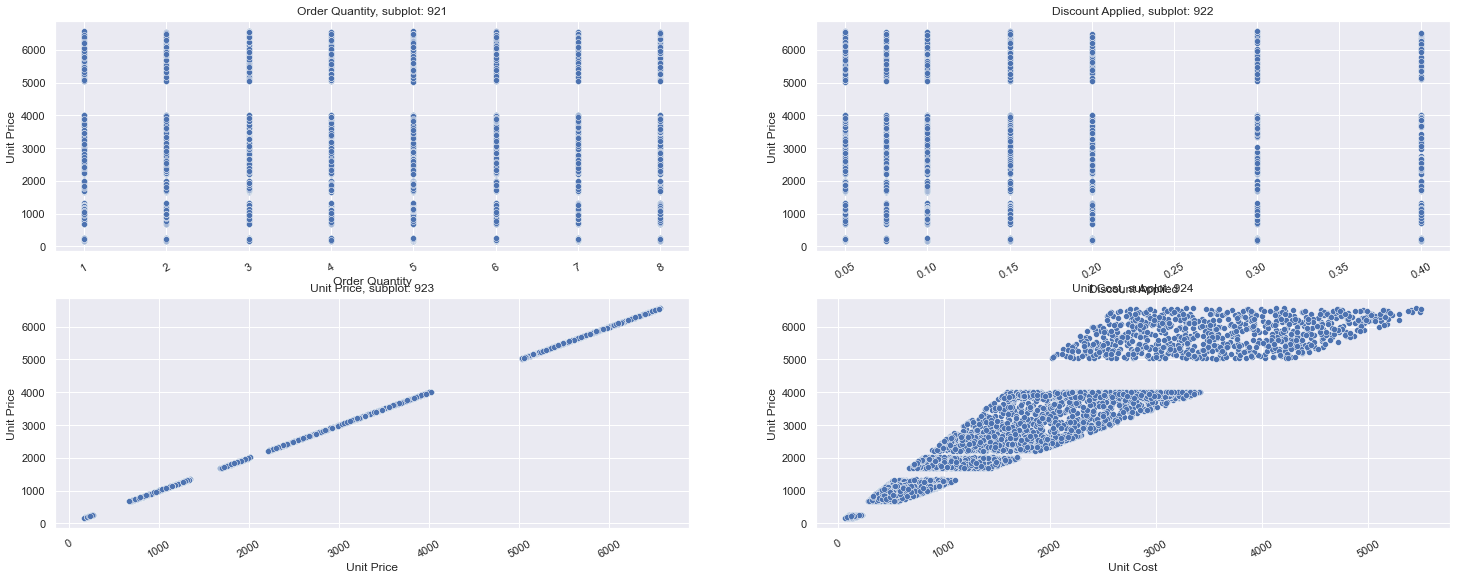

In [39]:
a=9
b=2
c=1
fig = plt.figure(figsize=(25,45))
for i in numerical:
    plt.subplot(a, b, c)
    plt.title('{}, subplot: {}{}{}'.format(i, a, b, c))
    plt.xlabel(i)
    plt.xticks(rotation=30)
    sns.scatterplot(x=i, y="Unit Price", data=data)
    c = c + 1

## RFMC Analysis

#### Frequency

In [40]:
df = pd.DataFrame(data.groupby(['CustomerID']).count()['OrderNumber'])

In [41]:
df.head()

,OrderNumber
CustomerID,
1,152
2,135
3,181
4,167
5,159


In [42]:
df= df.rename(columns={'OrderNumber':'Frequency'})

In [43]:
df.head()

,Frequency
CustomerID,
1,152
2,135
3,181
4,167
5,159


#### Recency

In [44]:
from datetime import datetime, timedelta

In [45]:
max_date = max(data['OrderDate'])+timedelta(days=1)

In [46]:
df['Recency']=data.groupby(['CustomerID']).agg({'OrderDate': lambda x: (max_date - x.max()).days})

In [47]:
df.head()

,Frequency,Recency
CustomerID,,
1,152,8
2,135,8
3,181,9
4,167,4
5,159,29


#### Monetary 

In [48]:
totalamount = data['Order Quantity']*data['Unit Price']
data['TotalAmount'] = totalamount - totalamount*data['Discount Applied']

In [49]:
data.head()

,OrderNumber,Sales Channel,WarehouseCode,ProcuredDate,OrderDate,ShipDate,DeliveryDate,CurrencyCode,SalesTeamID,CustomerID,StoreID,ProductID,Order Quantity,Discount Applied,Unit Price,Unit Cost,TotalAmount
0,SO - 000101,1,4,2017-12-31,2018-05-31,2018-06-14,2018-06-19,0,6,15,259,12,5,0.075,1963.1,1001.181,9079.3375
1,SO - 000102,2,2,2017-12-31,2018-05-31,2018-06-22,2018-07-02,0,14,20,196,27,3,0.075,3939.6,3348.660,10932.3900
2,SO - 000103,0,4,2017-12-31,2018-05-31,2018-06-21,2018-07-01,0,21,16,213,16,1,0.050,1775.5,781.220,1686.7250
3,SO - 000104,3,2,2017-12-31,2018-05-31,2018-06-02,2018-06-07,0,28,48,107,23,8,0.075,2324.9,1464.687,17204.2600
4,SO - 000105,0,2,2018-04-10,2018-05-31,2018-06-16,2018-06-26,0,22,49,111,26,8,0.100,1822.4,1476.144,13121.2800


In [50]:
df['MonetaryValue']=data.groupby(['CustomerID'])['TotalAmount'].sum()

In [51]:
df.head()

,Frequency,Recency,MonetaryValue
CustomerID,,,
1,152,8,1.175021e+06
2,135,8,1.179320e+06
3,181,9,1.628232e+06
4,167,4,1.569468e+06
5,159,29,1.426164e+06


this is the aggregate table that we use to calculate the relative value of recency, frequency an monetary.

### Relative table (RFM Score)

##### Frequency

In [52]:
df["FScore"] = pd.qcut(df['Frequency'], q=4,labels=[1, 2, 3, 4])

In [53]:
df.head()

,Frequency,Recency,MonetaryValue,FScore
CustomerID,,,,
1,152,8,1.175021e+06,2
2,135,8,1.179320e+06,1
3,181,9,1.628232e+06,4
4,167,4,1.569468e+06,3
5,159,29,1.426164e+06,3


##### Recency

In [54]:
df["RScore"] = pd.qcut(df['Recency'],q=4,labels=[4, 3, 2, 1])

In [55]:
df.head()

,Frequency,Recency,MonetaryValue,FScore,RScore
CustomerID,,,,,
1,152,8,1.175021e+06,2,2
2,135,8,1.179320e+06,1,2
3,181,9,1.628232e+06,4,1
4,167,4,1.569468e+06,3,3
5,159,29,1.426164e+06,3,1


##### Monetary

In [56]:
df["MScore"] = pd.qcut(df['MonetaryValue'], q=4,labels=[1, 2, 3, 4])

In [57]:
df.head()

,Frequency,Recency,MonetaryValue,FScore,RScore,MScore
CustomerID,,,,,,
1,152,8,1.175021e+06,2,2,1
2,135,8,1.179320e+06,1,2,1
3,181,9,1.628232e+06,4,1,4
4,167,4,1.569468e+06,3,3,3
5,159,29,1.426164e+06,3,1,2


In [58]:
Rscore = df['RScore'].astype('string')

In [59]:
Fscore = df['FScore'].astype('string')

In [60]:
Mscore = df['MScore'].astype('string')

In [61]:
df['RFM_LoyaltyLevel']=(Rscore+Fscore+Mscore).astype('int')

In [62]:
df.head(10)

,Frequency,Recency,MonetaryValue,FScore,RScore,MScore,RFM_LoyaltyLevel
CustomerID,,,,,,,
1,152,8,1.175021e+06,2,2,1,221
2,135,8,1.179320e+06,1,2,1,211
3,181,9,1.628232e+06,4,1,4,144
4,167,4,1.569468e+06,3,3,3,333
5,159,29,1.426164e+06,3,1,2,132
6,143,3,1.347558e+06,1,4,2,412
7,153,2,1.388690e+06,2,4,2,422
8,142,4,1.230549e+06,1,3,1,311
9,171,7,1.617932e+06,4,2,4,244


In [63]:
df.dtypes

Frequency              int64
Recency                int64
MonetaryValue        float64
FScore              category
RScore              category
MScore              category
RFM_LoyaltyLevel       int32
dtype: object

# Clustring

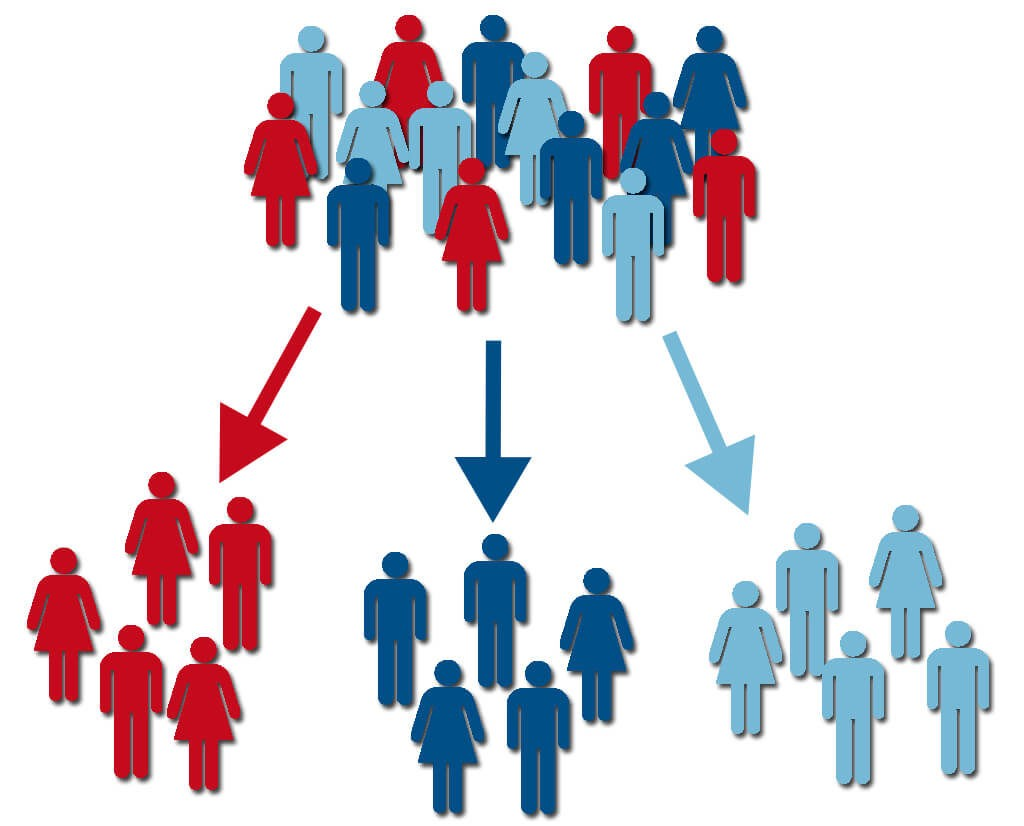

Clustering is the task of dividing the population or data points into a number of groups such that data points in the same groups are more similar to other data points in the same group than those in other groups. In simple words, the aim is to segregate groups with similar traits and assign them into clusters.

Let’s understand this with an example. Suppose, you are the head of a rental store and wish to understand preferences of your costumers to scale up your business. Is it possible for you to look at details of each costumer and devise a unique business strategy for each one of them? Definitely not. But, what you can do is to cluster all of your costumers into say 10 groups based on their purchasing habits and use a separate strategy for costumers in each of these 10 groups. And this is what we call clustering
and in this I'm using KMeans 

#### Kmeans
algorithm is an iterative algorithm that tries to partition the dataset into K distinct clusters. It tries to make the intra-cluster data points as similar as possible while also keeping the clusters as far as possible. It assigns data points to a cluster such that the sum of the squared distance between the data points and the cluster’s centroid is at the minimum. The less variation we have within clusters, the more homogeneous the data points are within the same cluster.

I using elbow method to decide K value for the K-Means clustering. 

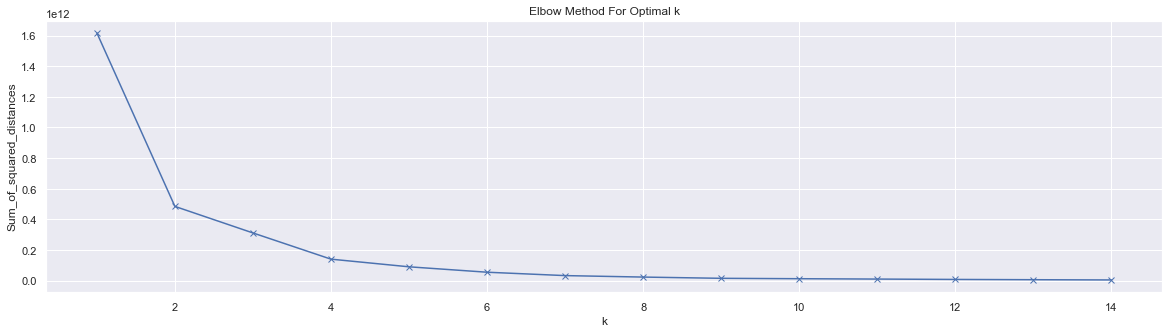

In [64]:
from sklearn.cluster import KMeans

Sum_of_squared_distances = []

K = range(1,15)

for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(df)
    Sum_of_squared_distances.append(km.inertia_)
    
plt.figure(figsize=(20,5))
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

From the figure above we can see that the most optimal values are 2. So we choose 2 as the k values of the k-means model

In [65]:
kmeans = KMeans(n_clusters = 2, max_iter = 50)
kmeans.fit(df)

KMeans(max_iter=50, n_clusters=2)

In [66]:
df['cluster'] = kmeans.labels_
df.head()

,Frequency,Recency,MonetaryValue,FScore,RScore,MScore,RFM_LoyaltyLevel,cluster
CustomerID,,,,,,,,
1,152,8,1.175021e+06,2,2,1,221,0
2,135,8,1.179320e+06,1,2,1,211,0
3,181,9,1.628232e+06,4,1,4,144,1
4,167,4,1.569468e+06,3,3,3,333,1
5,159,29,1.426164e+06,3,1,2,132,0


Now, the customers are divided into 2 groups, the last cluster people are the ones who spent more

<AxesSubplot:xlabel='cluster', ylabel='Frequency'>

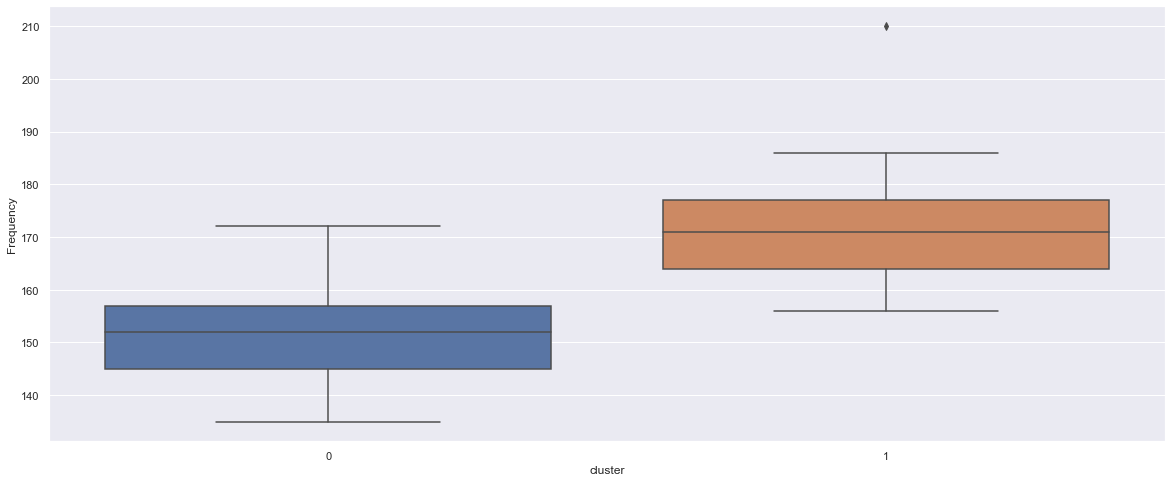

In [67]:
sns.boxplot(x = 'cluster', y = 'Frequency', data = df)

Here the first group from the cluster are more frequent customers

<AxesSubplot:xlabel='cluster', ylabel='MonetaryValue'>

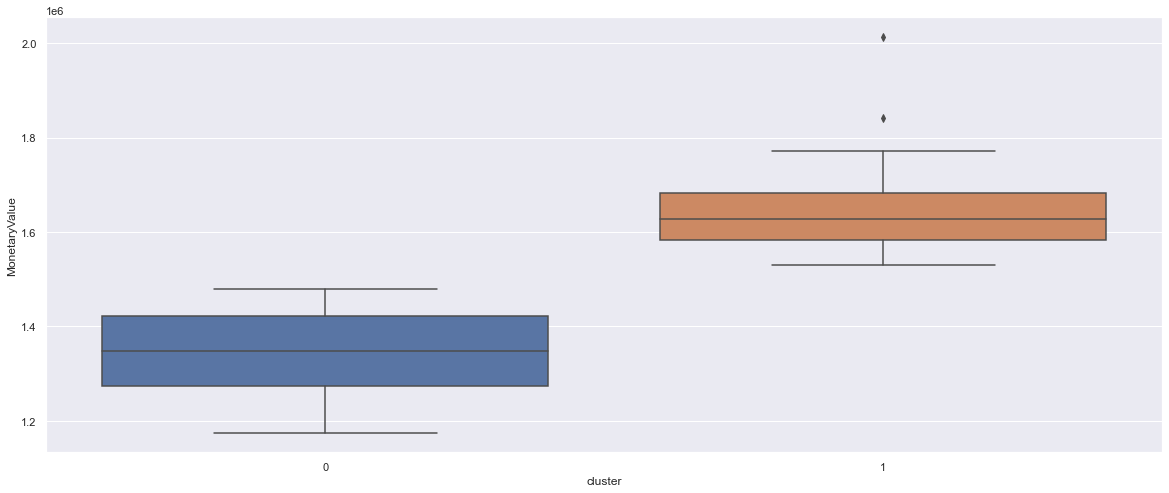

In [68]:
sns.boxplot(x='cluster', y='MonetaryValue', data = df)

<AxesSubplot:xlabel='cluster', ylabel='Recency'>

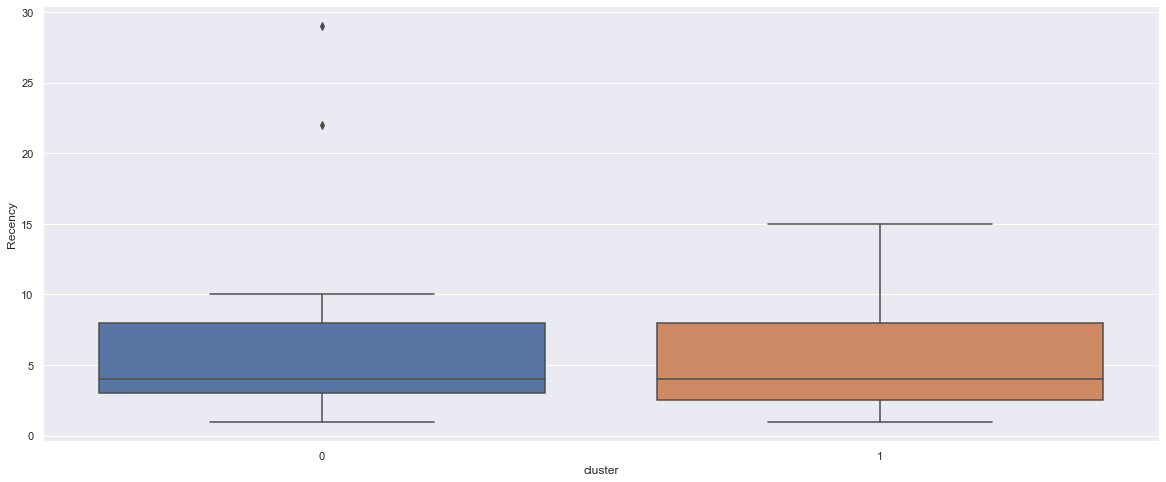

In [69]:
sns.boxplot(x='cluster', y='Recency', data= df)

K-Means


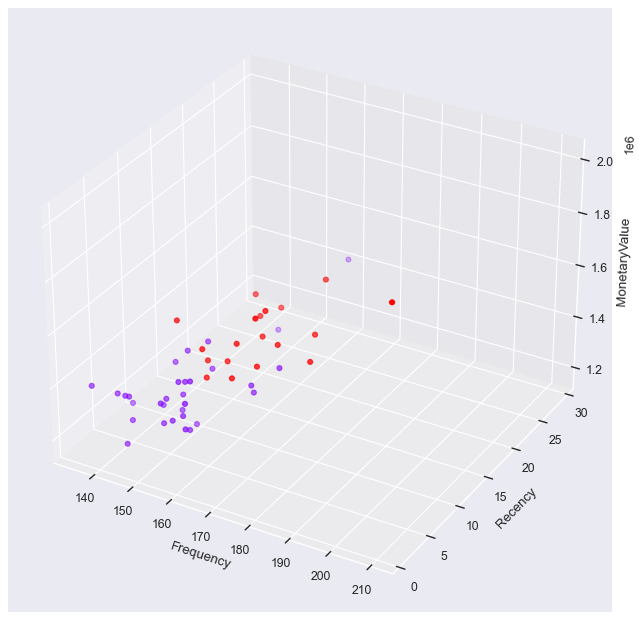

In [70]:
from mpl_toolkits.mplot3d import Axes3D

model = KMeans(n_clusters=2)
model.fit(df)
kmeans_labels = model.labels_

fig = plt.figure(num=None, figsize=(15, 10), dpi=80, facecolor='w', edgecolor='k')
ax = plt.axes(projection="3d")

ax.scatter3D(df['Frequency'],df['Recency'],df['MonetaryValue'],
             c=df['cluster'], cmap='rainbow')

xLabel = ax.set_xlabel('Frequency', linespacing=3.2)
yLabel = ax.set_ylabel('Recency', linespacing=3.1)
zLabel = ax.set_zlabel('MonetaryValue', linespacing=3.4)
print("K-Means")

### Conclusion 

- 1 cluster customers are more frequent and have more monetary value.
- 0 cluster customers are less frequent and less monetary value.
- In Recency both clusters customers are same

# Customer Ranking

The customer ranking program is a sales performance and credit management tool that analyzes customer sales activity, and his consistency. By ranking Customers we can find that how to invest on businees in affective way. so it have great impoertance


### Raking on the basis of Acerage RFM value 

In [71]:
Rscore = df['RScore'].astype('int')

In [72]:
Mscore = df['MScore'].astype('int')

In [73]:
Fscore = df['FScore'].astype('int')

In [74]:
df['RFM_average']=((Rscore+Fscore+Mscore)/3)

In [75]:
df.head()

,Frequency,Recency,MonetaryValue,FScore,RScore,MScore,RFM_LoyaltyLevel,cluster,RFM_average
CustomerID,,,,,,,,,
1,152,8,1.175021e+06,2,2,1,221,0,1.666667
2,135,8,1.179320e+06,1,2,1,211,0,1.333333
3,181,9,1.628232e+06,4,1,4,144,1,3.000000
4,167,4,1.569468e+06,3,3,3,333,1,3.000000
5,159,29,1.426164e+06,3,1,2,132,0,2.000000


In [76]:
df.sort_values(by=['RFM_average','MonetaryValue'], ascending=(False,False) , inplace= True)

In [77]:
rank = []
for i in range(len(df)):
    rank.append(i+1)


In [78]:
df['Customer Rank'] = rank

In [79]:
df.head(10)

,Frequency,Recency,MonetaryValue,FScore,RScore,MScore,RFM_LoyaltyLevel,cluster,RFM_average,Customer Rank
CustomerID,,,,,,,,,,
12,210,2,2.012877e+06,4,4,4,444,1,4.000000,1
29,179,1,1.841005e+06,4,4,4,444,1,4.000000,2
13,171,3,1.673218e+06,4,4,4,444,1,4.000000,3
39,176,3,1.610879e+06,4,4,4,444,1,4.000000,4
32,173,1,1.595805e+06,4,4,4,444,1,4.000000,5
21,164,2,1.642715e+06,3,4,4,434,1,3.666667,6
17,175,5,1.770662e+06,4,2,4,244,1,3.333333,7
33,156,3,1.693782e+06,2,4,4,424,1,3.333333,8
11,178,5,1.658925e+06,4,2,4,244,1,3.333333,9


### 1. Best Customer 

Best Recency score = 4: most recently purchase. Best Frequency score = 4: most quantity purchase. Best Monetary score = 4: spent the most.

Let's see who are our Champions (best customers).

In [80]:
df[df['RFM_LoyaltyLevel']==444].sort_values('MonetaryValue', ascending=False)

,Frequency,Recency,MonetaryValue,FScore,RScore,MScore,RFM_LoyaltyLevel,cluster,RFM_average,Customer Rank
CustomerID,,,,,,,,,,
12,210,2,2.012877e+06,4,4,4,444,1,4.0,1
29,179,1,1.841005e+06,4,4,4,444,1,4.0,2
13,171,3,1.673218e+06,4,4,4,444,1,4.0,3
39,176,3,1.610879e+06,4,4,4,444,1,4.0,4
32,173,1,1.595805e+06,4,4,4,444,1,4.0,5


Who They Are: Highly engaged customers who have bought the most recent, the most often, and generated the most revenue.

Marketing Strategies: Focus on loyalty programs and new product introductions. These customers have proven to have a higher willingness to pay, so don't use discount pricing to generate incremental sales. Instead, focus on value added offers through product recommendations based on previous purchases.

### 2.Lost Cheap Customers

In [81]:
df[df['RFM_LoyaltyLevel']==111].sort_values('MonetaryValue', ascending=False)

,Frequency,Recency,MonetaryValue,FScore,RScore,MScore,RFM_LoyaltyLevel,cluster,RFM_average,Customer Rank
CustomerID,,,,,,,,,,
24,151,22,1.250650e+06,1,1,1,111,0,1.0,50


Who They Are: Great past customers who haven't bought in awhile.

Marketing Strategies: Customers leave for a variety of reasons. Depending on your situation price deals, new product launches, or other retention strategies.

### 3. How many customers do we have in each segment?



We are classified customers into six groups

1. Best Customers
2. Loyal Customers
3. Big Spenders
4. Almost Lost
5. Lost Customer
6. Lost Cheap Customers

In [82]:
print("Best Customers: ",len(df[df['RFM_LoyaltyLevel']==444]))
print('Loyal Customers: ',len(df[df['FScore']==4]))
print("Big Spenders: ",len(df[df['MScore']==4]))
print('Almost Lost: ', len(df[df['RFM_LoyaltyLevel']==244]))
print('Lost Customers: ',len(df[df['RFM_LoyaltyLevel']==144]))
print('Lost Cheap Customers: ',len(df[df['RFM_LoyaltyLevel']==111]))

Best Customers:  5
Loyal Customers:  13
Big Spenders:  13
Almost Lost:  4
Lost Customers:  2
Lost Cheap Customers:  1


Now that we knew our customers segments we can choose how to target or deal with each segment.

For example:

Best Customers - Champions: Reward them. They can be early adopters to new products. Suggest them "Refer a friend".

At Risk: Send them personalized emails to encourage them to shop.

# EMPLOYEE RANKING

Ranking, also known as forced ranking or stacking is a type of performance evaluation that sorts set percentages of employees into specific categories based on how well they are performing compared with their peers

In [83]:
dfemp = pd.DataFrame(data.groupby(['SalesTeamID']).count()['OrderNumber'])

In [84]:
totalamount = data['Order Quantity']*data['Unit Price']
data['TotalAmount'] = totalamount - totalamount*data['Discount Applied']

In [85]:
dfemp['MonetaryValue']=data.groupby(['SalesTeamID'])['TotalAmount'].sum()

In [86]:
dfemp.sort_values(by=['MonetaryValue'], ascending=False,  inplace= True)

In [87]:
dfemp.head()

,OrderNumber,MonetaryValue
SalesTeamID,,
26,296,2.980413e+06
8,315,2.857257e+06
11,289,2.846864e+06
1,302,2.825689e+06
13,340,2.819401e+06


In [88]:
rank = []
for i in range(len(dfemp)):
    rank.append(i+1)


In [89]:
dfemp['Employee Rank'] = rank

In [90]:
dfemp.head(10)

,OrderNumber,MonetaryValue,Employee Rank
SalesTeamID,,,
26,296,2.980413e+06,1
8,315,2.857257e+06,2
11,289,2.846864e+06,3
1,302,2.825689e+06,4
13,340,2.819401e+06,5
19,293,2.817185e+06,6
12,314,2.786421e+06,7
24,284,2.756286e+06,8
7,303,2.721307e+06,9


The Employees Ranking is on the basis on monetary values. The employee who generate more profit is one the top of the list.